In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [239]:
data = pd.read_csv("../input/winequality-red.csv")

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [240]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [241]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [242]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [243]:
for i in data.columns[0:11]:
    print(i,stats.spearmanr(data['quality'],data[i]))

fixed acidity SpearmanrResult(correlation=0.11408367358880324, pvalue=4.8012196391814265e-06)
volatile acidity SpearmanrResult(correlation=-0.3806465104253755, pvalue=2.7349440224655985e-56)
citric acid SpearmanrResult(correlation=0.2134809144221363, pvalue=6.158952285215761e-18)
residual sugar SpearmanrResult(correlation=0.032048167529057335, pvalue=0.20024535327856613)
chlorides SpearmanrResult(correlation=-0.1899223356173072, pvalue=1.8828578369578738e-14)
free sulfur dioxide SpearmanrResult(correlation=-0.0569006455015393, pvalue=0.022883222776915322)
total sulfur dioxide SpearmanrResult(correlation=-0.1967350754412208, pvalue=2.046487847598195e-15)
density SpearmanrResult(correlation=-0.17707406597199962, pvalue=9.918139164678968e-13)
pH SpearmanrResult(correlation=-0.043671934788928383, pvalue=0.08084594364705261)
sulphates SpearmanrResult(correlation=0.37706019910212196, pvalue=3.477695182639494e-55)
alcohol SpearmanrResult(correlation=0.4785316874702435, pvalue=2.72683773984726

In [244]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [245]:
x = data[data.columns[0:11]]

y = data['quality']



/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


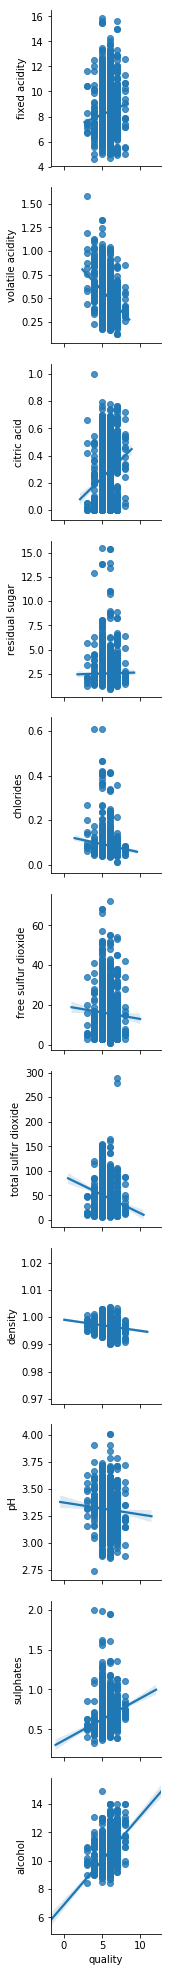

In [246]:
import seaborn as sns

sns.pairplot(data, x_vars='quality', y_vars=data.columns[0:11], kind='reg')

In [247]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [259]:
model = LinearRegression()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.01)

model.fit(x_train,y_train)

a = model.predict(x_test)

In [249]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,a)

0.4942983861774052

In [250]:
model.coef_

array([ 2.58025644e-02, -1.07730648e+00, -1.88978282e-01,  1.62515537e-02,
       -1.88462210e+00,  4.44610728e-03, -3.29600197e-03, -1.77821191e+01,
       -4.19293819e-01,  9.12991288e-01,  2.74194096e-01])

In [251]:
for i in data.columns[0:11]:
    print(i,stats.spearmanr(data['quality'],data[i]))

fixed acidity SpearmanrResult(correlation=0.11408367358880324, pvalue=4.8012196391814265e-06)
volatile acidity SpearmanrResult(correlation=-0.3806465104253755, pvalue=2.7349440224655985e-56)
citric acid SpearmanrResult(correlation=0.2134809144221363, pvalue=6.158952285215761e-18)
residual sugar SpearmanrResult(correlation=0.032048167529057335, pvalue=0.20024535327856613)
chlorides SpearmanrResult(correlation=-0.1899223356173072, pvalue=1.8828578369578738e-14)
free sulfur dioxide SpearmanrResult(correlation=-0.0569006455015393, pvalue=0.022883222776915322)
total sulfur dioxide SpearmanrResult(correlation=-0.1967350754412208, pvalue=2.046487847598195e-15)
density SpearmanrResult(correlation=-0.17707406597199962, pvalue=9.918139164678968e-13)
pH SpearmanrResult(correlation=-0.043671934788928383, pvalue=0.08084594364705261)
sulphates SpearmanrResult(correlation=0.37706019910212196, pvalue=3.477695182639494e-55)
alcohol SpearmanrResult(correlation=0.4785316874702435, pvalue=2.72683773984726

In [258]:
print(model.score(x_test,y_test))
print(model.coef_)


0.550471562824326
[ 2.58025644e-02 -1.07730648e+00 -1.88978282e-01  1.62515537e-02
 -1.88462210e+00  4.44610728e-03 -3.29600197e-03 -1.77821191e+01
 -4.19293819e-01  9.12991288e-01  2.74194096e-01]


[]

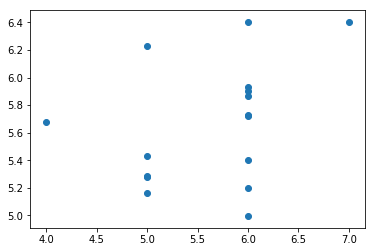

In [260]:
fig,ax = plt.subplots()

ax = plt.scatter(y_test,a)

plt.plot()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


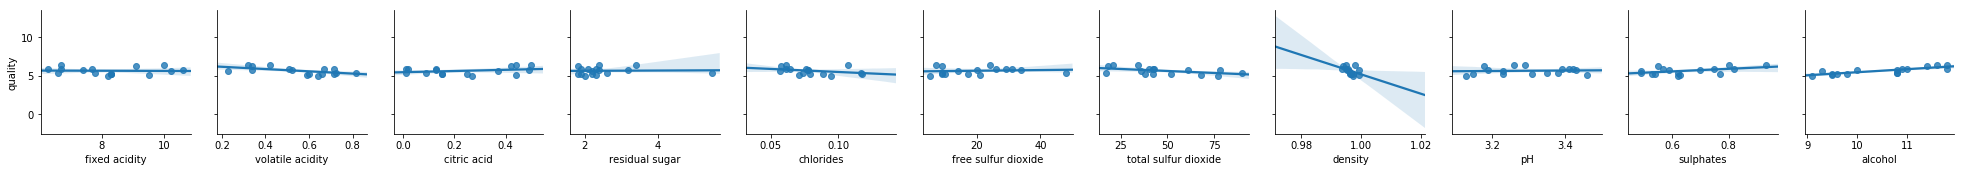

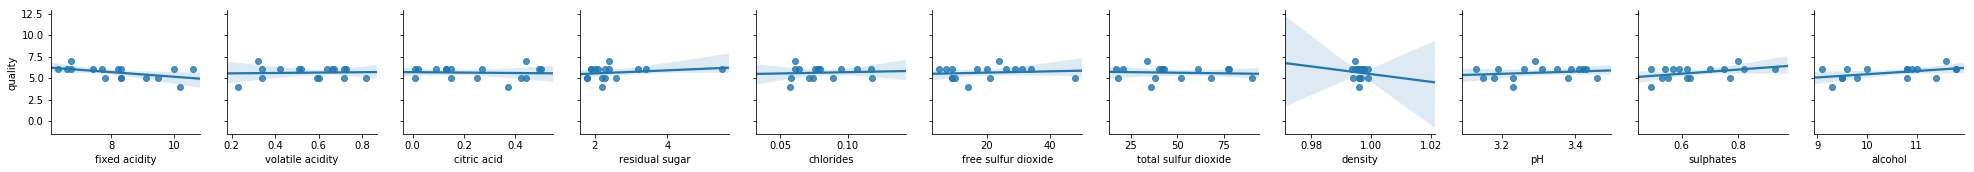

In [282]:
reg = pd.DataFrame(x_test,columns=x_test.columns)

reg['quality']=a

reg

sns.pairplot(reg,x_vars=reg.columns[0:11],y_vars='quality',kind='reg')

reg['quality']=y_test
sns.pairplot(reg,x_vars=reg.columns[0:11],y_vars='quality',kind='reg')